In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

initial_results = pd.read_csv('InitialResults.csv', decimal=",")
initial_results.head()

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Forest 10 Tree Without,0.943249,0.960833,0.962694,0.886815,0.961724
1,Forest 20 Tree Without,0.952453,0.962703,0.973584,0.891120,0.968099
2,Forest 30 Tree Without,0.952452,0.959931,0.976750,0.882527,0.968243
3,Forest 40 Tree Without,0.954943,0.960834,0.979329,0.884216,0.969962
4,Forest 50 Tree Without,0.954369,0.961735,0.977544,0.887637,0.969533


In [7]:
initial_results.dtypes

Algorithm       object
Accuracy       float64
Precision      float64
Sensitivity    float64
Specificity    float64
F1 Score       float64
dtype: object

In [31]:
forest_results = initial_results.iloc[0:15]
forest_results.shape

(15, 6)

In [32]:
forest_results[['algorithm','Number of trees','Tree','Preprocessing']]=forest_results['Algorithm'].str.split(expand=True)
forest_results.drop(['Algorithm','Tree'], inplace=True, axis=1)
forest_results.head()

,Accuracy,Precision,Sensitivity,Specificity,F1 Score,algorithm,Number of trees,Preprocessing
0,0.943249,0.960833,0.962694,0.886815,0.961724,Forest,10,Without
1,0.952453,0.962703,0.973584,0.891120,0.968099,Forest,20,Without
2,0.952452,0.959931,0.976750,0.882527,0.968243,Forest,30,Without
3,0.954943,0.960834,0.979329,0.884216,0.969962,Forest,40,Without
4,0.954369,0.961735,0.977544,0.887637,0.969533,Forest,50,Without


In [34]:
forest_results_stacked = pd.melt(forest_results, id_vars=['algorithm','Number of trees', 'Preprocessing'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
forest_results_stacked.head()

,algorithm,Number of trees,Preprocessing,Metric,Percentage
0,Forest,10,Without,Accuracy,0.943249
1,Forest,20,Without,Accuracy,0.952453
2,Forest,30,Without,Accuracy,0.952452
3,Forest,40,Without,Accuracy,0.954943
4,Forest,50,Without,Accuracy,0.954369


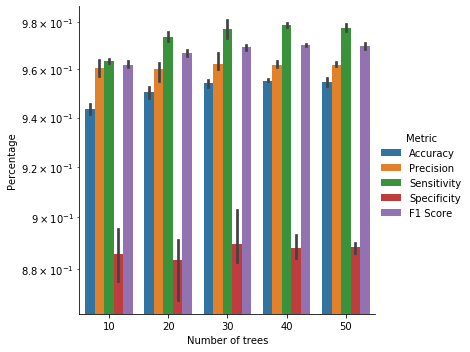

In [49]:
graph = sns.catplot(x="Number of trees", y="Percentage", hue='Metric', kind="bar", data=forest_results_stacked)
graph.fig.get_axes()[0].set_yscale("log")

In [47]:
forest_results_stacked['Algorithm variations'] = forest_results_stacked['Number of trees'].astype(str) +" "+ forest_results_stacked['Preprocessing']

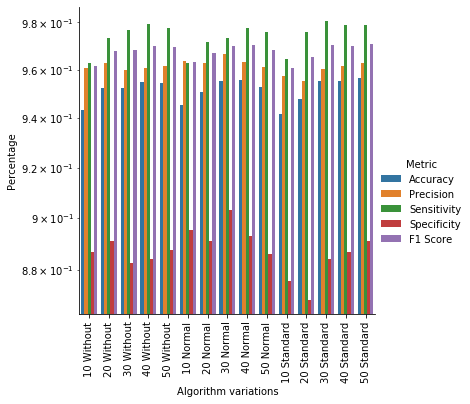

In [48]:
graph = sns.catplot(x="Algorithm variations", y="Percentage", hue='Metric', kind="bar", data=forest_results_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [56]:
k_nearest_results = initial_results.iloc[15:45]
k_nearest_results.tail()

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score
40,6 neighbour Standard,0.952456,0.964676,0.971689,0.896330,0.968151
41,7 neighbour Standard,0.948813,0.953269,0.979081,0.860597,0.965979
42,8 neighbour Standard,0.953987,0.964260,0.974219,0.894940,0.969184
43,9 neighbour Standard,0.948428,0.953709,0.978043,0.862067,0.965695
44,10 neighbour Standard,0.952646,0.962039,0.974682,0.888686,0.968288


In [58]:
k_nearest_results[['Number of neighbours','algorithm', 'Preprocessing']]=k_nearest_results['Algorithm'].str.split(expand=True)
k_nearest_results.drop(['Algorithm','algorithm'], inplace=True, axis=1)

In [59]:
k_nearest_results['Algorithm variations'] = k_nearest_results['Number of neighbours'].astype(str) +" "+ k_nearest_results['Preprocessing']
k_nearest_results.head()

,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Number of neighbours,Preprocessing,Algorithm variations
15,0.929828,0.936748,0.971054,0.810769,0.953567,1,Without,1 Without
16,0.935580,0.966062,0.946613,0.903709,0.956186,2,Without,2 Without
17,0.934814,0.938912,0.975774,0.816929,0.956944,3,Without,3 Without
18,0.942290,0.956345,0.966500,0.872551,0.961361,4,Without,4 Without
19,0.936348,0.937945,0.979121,0.813022,0.958058,5,Without,5 Without


In [60]:
k_nearest_results_stacked = pd.melt(k_nearest_results, id_vars=['Algorithm variations'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
k_nearest_results_stacked.head()

,Algorithm variations,Metric,Percentage
0,1 Without,Accuracy,0.929828
1,2 Without,Accuracy,0.935580
2,3 Without,Accuracy,0.934814
3,4 Without,Accuracy,0.942290
4,5 Without,Accuracy,0.936348


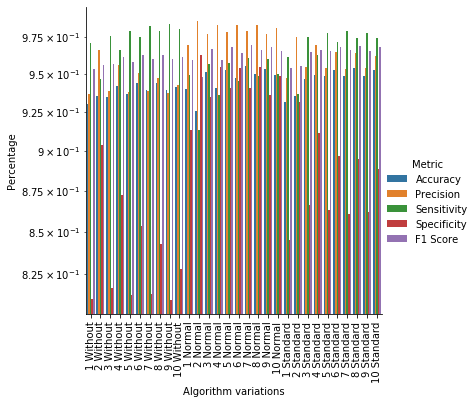

In [61]:
graph = sns.catplot(x="Algorithm variations", y="Percentage", hue='Metric', kind="bar", data=k_nearest_results_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

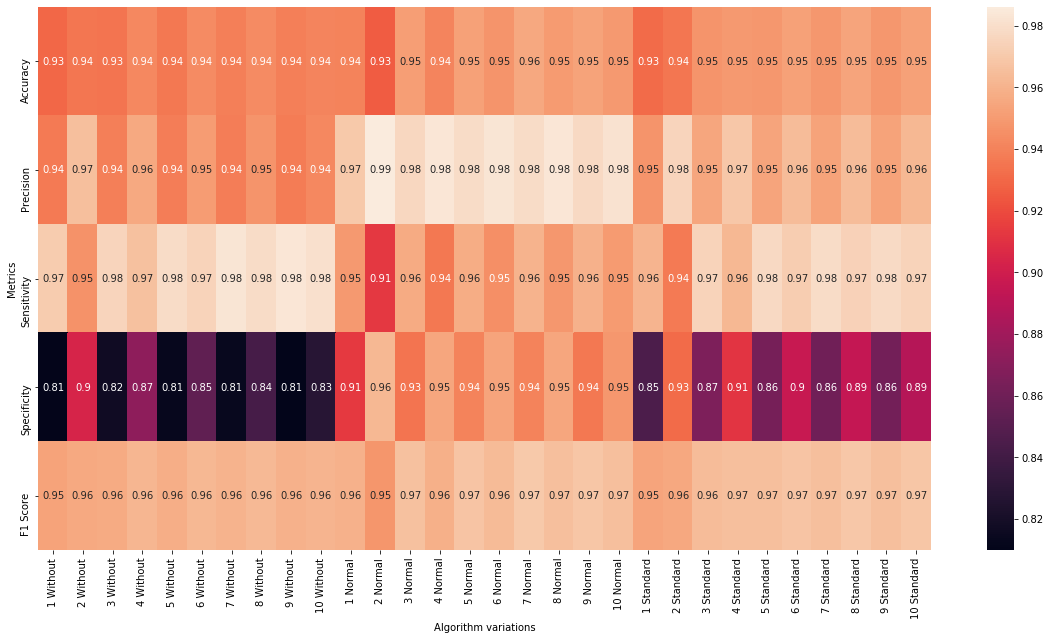

In [89]:
k_nearest_results_unstacked = k_nearest_results.set_index(['Algorithm variations'])
k_nearest_results_unstacked = k_nearest_results_unstacked.drop(['Number of neighbours', 'Preprocessing'], axis=1)
k_nearest_results_unstacked.columns.name = 'Metrics'
#k_nearest_results_unstacked.head()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(k_nearest_results_unstacked.T, annot=True, ax=ax)

In [90]:
svm_results = initial_results.iloc[144:]
svm_results.head()

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score
144,"C= 0,001 SVM Without",0.960891,0.973478,0.973943,0.922939,0.973685
145,"C= 0,01 SVM Without",0.960891,0.973478,0.973943,0.922939,0.973685
146,"C= 0,1 SVM Without",0.960891,0.973478,0.973943,0.922939,0.973685
147,"C= 1,0 SVM Without",0.960891,0.973478,0.973943,0.922939,0.973685
148,"C= 10,0 SVM Without",0.960891,0.973478,0.973943,0.922939,0.973685


In [93]:
svm_results[['label', 'C','algorithm', 'Preprocessing']]=svm_results['Algorithm'].str.split(expand=True)
svm_results.drop(['Algorithm', 'label','algorithm'], inplace=True, axis=1)

In [96]:
svm_results['Algorithm variations'] = svm_results['C'].astype(str) +" "+ svm_results['Preprocessing']
svm_results.head()

,Accuracy,Precision,Sensitivity,Specificity,F1 Score,C,Preprocessing,Algorithm variations
144,0.960891,0.973478,0.973943,0.922939,0.973685,"0,001",Without,"0,001 Without"
145,0.960891,0.973478,0.973943,0.922939,0.973685,"0,01",Without,"0,01 Without"
146,0.960891,0.973478,0.973943,0.922939,0.973685,"0,1",Without,"0,1 Without"
147,0.960891,0.973478,0.973943,0.922939,0.973685,"1,0",Without,"1,0 Without"
148,0.960891,0.973478,0.973943,0.922939,0.973685,"10,0",Without,"10,0 Without"


In [97]:
svm_results_stacked = pd.melt(svm_results, id_vars=['Algorithm variations'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
svm_results_stacked.head()

,Algorithm variations,Metric,Percentage
0,"0,001 Without",Accuracy,0.960891
1,"0,01 Without",Accuracy,0.960891
2,"0,1 Without",Accuracy,0.960891
3,"1,0 Without",Accuracy,0.960891
4,"10,0 Without",Accuracy,0.960891


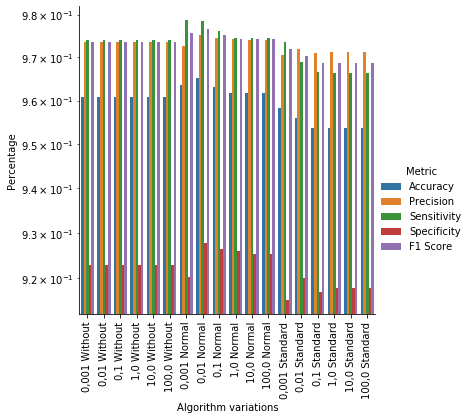

In [98]:
graph = sns.catplot(x="Algorithm variations", y="Percentage", hue='Metric', kind="bar", data=svm_results_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [18]:
neural_net_results = initial_results.iloc[45:144].fillna(0)
neural_net_results.tail()

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score
139,10-10-20 Standard (100 épocas),0.991951,0.993824,0.995459,0.981937,0.994625
140,10-20-20 Standard (100 épocas),0.992528,0.995917,0.994173,0.987478,0.995040
141,10-50-10 Standard (100 épocas),0.989271,0.994630,0.991089,0.983748,0.992845
142,10-10-50 Standard (100 épocas),0.989653,0.994338,0.991868,0.983112,0.993094
143,10-50-50 Standard (100 épocas),0.990610,0.993100,0.994437,0.979240,0.993759


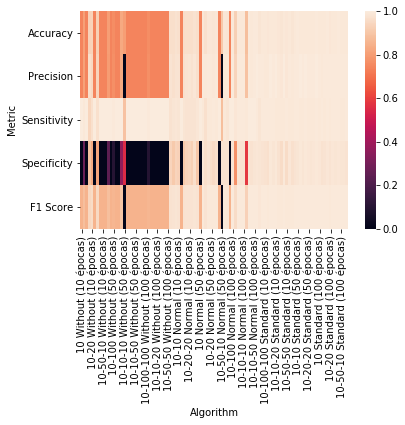

In [6]:
neural_net_results_unstack = neural_net_results.set_index(['Algorithm'])
neural_net_results_unstack.columns.name = "Metric"
#fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(neural_net_results_unstack.T)


In [21]:
neural_net_results[['Architecture', 'Preprocessing', 'Epochs']]=neural_net_results['Algorithm'].str.split(expand=True, n=2)
neural_net_results.drop(['Algorithm', 'Preprocessing'], inplace=True, axis=1)

In [22]:
neural_net_results['Algorithm variations'] = neural_net_results['Architecture'] +" "+ neural_net_results['Epochs']
neural_net_results.head()

,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Architecture,Epochs,Algorithm variations
45,0.742901,0.742901,1.000000,0.000000,0.852434,10,(10 épocas),10 (10 épocas)
46,0.805161,0.810299,0.989901,0.271950,0.886671,10-100,(10 épocas),10-100 (10 épocas)
47,0.742901,0.742901,1.000000,0.000000,0.852434,10-100-100,(10 épocas),10-100-100 (10 épocas)
48,0.930062,0.966868,0.943102,0.888190,0.948747,10-10,(10 épocas),10-10 (10 épocas)
49,0.936942,0.951936,0.972034,0.832194,0.959890,10-20,(10 épocas),10-20 (10 épocas)


In [23]:
neural_net_results.drop(['Architecture', 'Epochs'], axis=1, inplace=True)

In [24]:
neural_net_results_unstack = neural_net_results.set_index(['Algorithm variations'])
neural_net_results_unstack.columns.name = "Metric"

In [29]:
neural_net_results_without_unstack = neural_net_results_unstack.iloc[:33]
neural_net_results_normal_unstack = neural_net_results_unstack.iloc[33:66]
neural_net_results_standard_unstack = neural_net_results_unstack.iloc[66:99]
print(neural_net_results_without_unstack.shape)
neural_net_results_without_unstack.tail()

(33, 5)


Metric,Accuracy,Precision,Sensitivity,Specificity,F1 Score
Algorithm variations,,,,,
10-10-20 (100 épocas),0.742901,0.742901,1.0,0.0,0.852434
10-20-20 (100 épocas),0.742901,0.742901,1.0,0.0,0.852434
10-50-10 (100 épocas),0.742901,0.742901,1.0,0.0,0.852434
10-10-50 (100 épocas),0.742901,0.742901,1.0,0.0,0.852434
10-50-50 (100 épocas),0.742901,0.742901,1.0,0.0,0.852434


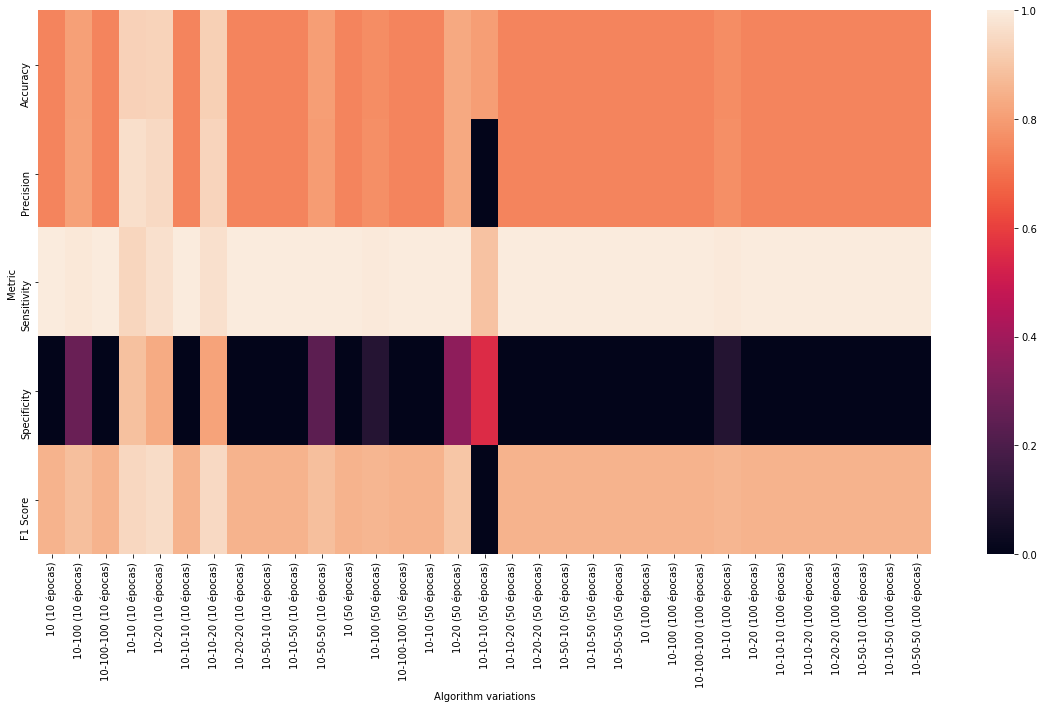

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(neural_net_results_without_unstack.T)

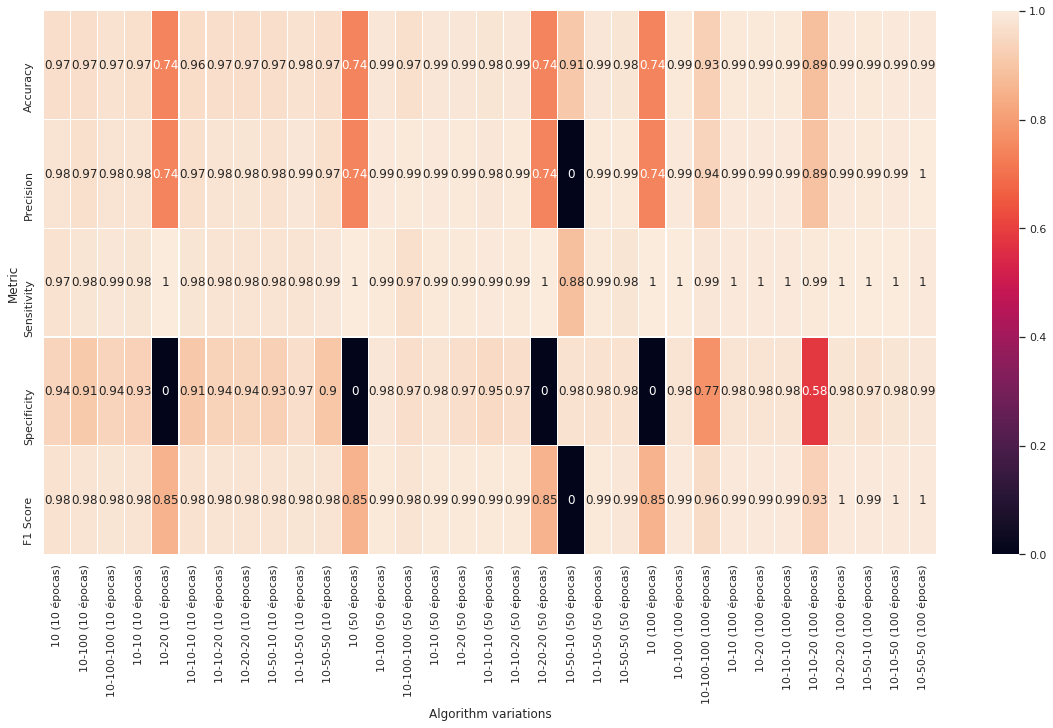

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(neural_net_results_normal_unstack.T, linewidth=0.1, annot=True)

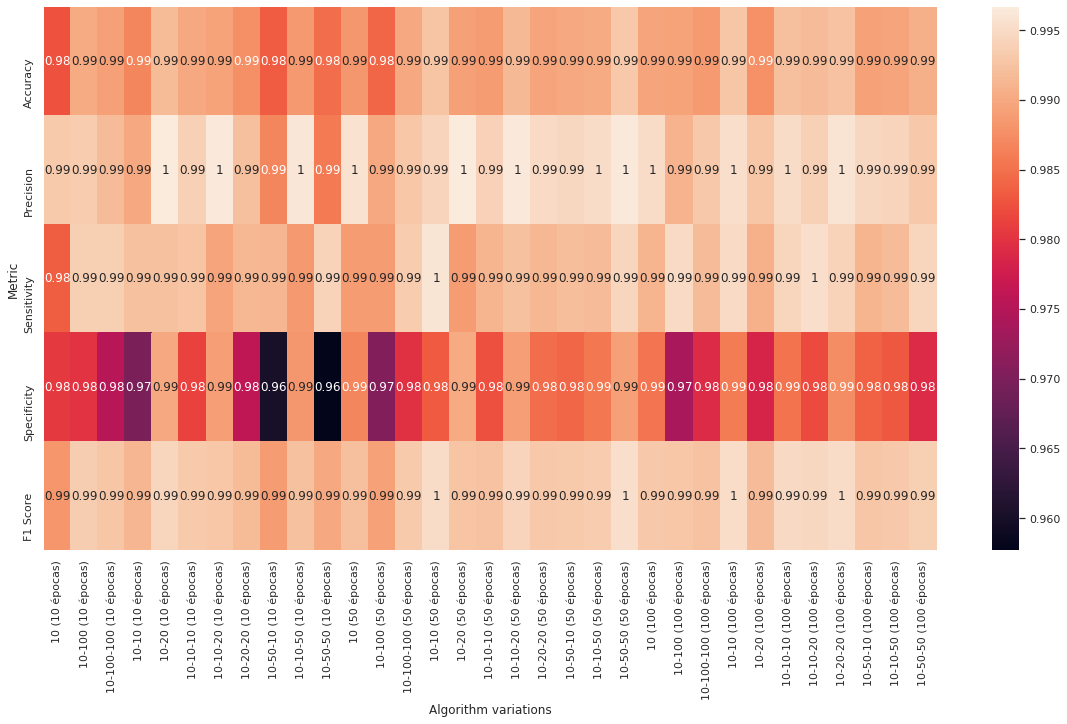

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(neural_net_results_standard_unstack.T, annot=True)

In [35]:
neural_net_results_without = neural_net_results.iloc[:33]
neural_net_results_normal = neural_net_results.iloc[33:66]
neural_net_results_standard = neural_net_results.iloc[66:99]
neural_net_results_without.tail()

,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Algorithm variations
73,0.742901,0.742901,1.0,0.0,0.852434,10-10-20 (100 épocas)
74,0.742901,0.742901,1.0,0.0,0.852434,10-20-20 (100 épocas)
75,0.742901,0.742901,1.0,0.0,0.852434,10-50-10 (100 épocas)
76,0.742901,0.742901,1.0,0.0,0.852434,10-10-50 (100 épocas)
77,0.742901,0.742901,1.0,0.0,0.852434,10-50-50 (100 épocas)


In [36]:
neural_net_results_without_stacked = pd.melt(neural_net_results_without, id_vars=['Algorithm variations'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
neural_net_results_normal_stacked = pd.melt(neural_net_results_normal, id_vars=['Algorithm variations'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
neural_net_results_standard_stacked = pd.melt(neural_net_results_standard, id_vars=['Algorithm variations'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
neural_net_results_without_stacked.head()

,Algorithm variations,Metric,Percentage
0,10 (10 épocas),Accuracy,0.742901
1,10-100 (10 épocas),Accuracy,0.805161
2,10-100-100 (10 épocas),Accuracy,0.742901
3,10-10 (10 épocas),Accuracy,0.930062
4,10-20 (10 épocas),Accuracy,0.936942


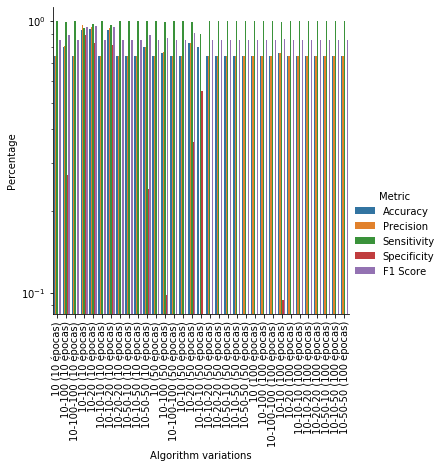

In [142]:
graph = sns.catplot(x="Algorithm variations", y="Percentage", hue='Metric', kind="bar", data=neural_net_results_without_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

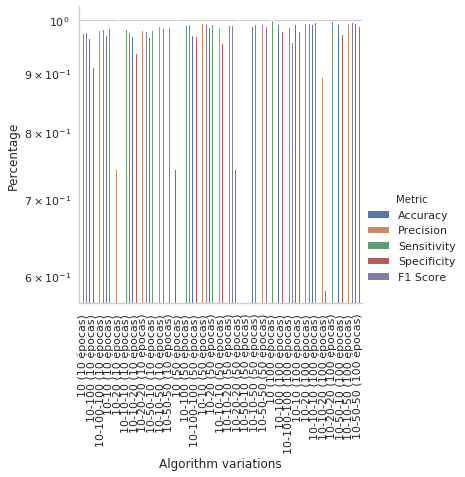

In [38]:
graph = sns.catplot(x="Algorithm variations", y="Percentage", hue='Metric', kind="bar", data=neural_net_results_normal_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

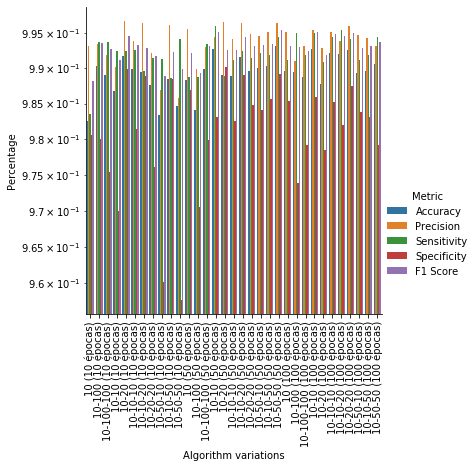

In [144]:
graph = sns.catplot(x="Algorithm variations", y="Percentage", hue='Metric', kind="bar", data=neural_net_results_standard_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [45]:
final_metrics = initial_results.iloc[[7,32,34,48,110,115,132,151]]
final_metrics

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score
7,Forest 30 Tree Normal,0.955140,0.966701,0.973290,0.902957,0.969919
32,8 neighbour Normal,0.950155,0.983651,0.948731,0.954876,0.965845
34,10 neighbour Normal,0.949581,0.981600,0.950048,0.948428,0.965549
48,10-10 Without (10 épocas),0.930062,0.966868,0.943102,0.888190,0.948747
110,10-50-50 Normal (100 épocas),0.993487,0.996185,0.995241,0.988030,0.995709
115,10-20 Standard (10 épocas),0.991762,0.996680,0.992410,0.989903,0.994500
132,10-50-50 Standard (50 épocas),0.993102,0.996419,0.994426,0.989128,0.995413
151,"C= 0,01 SVM Normal",0.965296,0.975109,0.978426,0.927742,0.976703


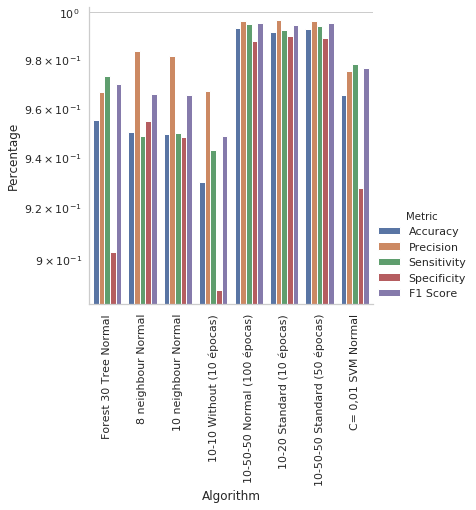

In [47]:
final_metrics_stacked = pd.melt(final_metrics, id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', kind="bar", data=final_metrics_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)

In [49]:
final_metrics_index = final_metrics.set_index(['Algorithm'])
final_metrics_index.mean(axis = 1)

Algorithm
Forest 30 Tree Normal            0.953602
8 neighbour Normal               0.960651
10 neighbour Normal              0.959041
10-10 Without (10 épocas)        0.935394
10-50-50 Normal (100 épocas)     0.993730
10-20 Standard (10 épocas)       0.993051
10-50-50 Standard (50 épocas)    0.993698
C= 0,01 SVM Normal               0.964655
dtype: float64

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


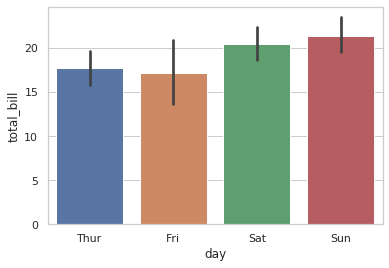

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)
tips.head()

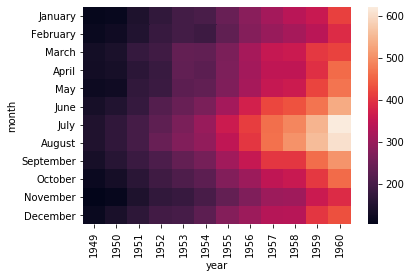

In [66]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

Metric,Accuracy,F1 Score,Precision,Sensitivity,Specificity
Algorithm variations,,,,,
1 Normal,0.939996,0.959287,0.969769,0.949082,0.913231
1 Standard,0.931369,0.954193,0.947413,0.961182,0.845250
1 Without,0.929828,0.953567,0.936748,0.971054,0.810769
10 Normal,0.949581,0.965549,0.981600,0.950048,0.948428
10 Standard,0.952646,0.968288,0.962039,0.974682,0.888686
10 Without,0.941334,0.961278,0.942689,0.980680,0.827778
2 Normal,0.925613,0.948071,0.986132,0.912935,0.962681
2 Standard,0.935391,0.955673,0.975295,0.936926,0.931704
2 Without,0.935580,0.956186,0.966062,0.946613,0.903709


In [ ]:
k_nearest_results_stacked.pivot("Algorithm variations", "Metric", "Percentage")